# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rozalina Zahra
- **Email:** rozalinazahra02@gmail.com
- **ID Dicoding:** rozalina_zahra

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

## Data Wrangling

### Gathering Data

Data yang digunakan adalah E-Commerce Public Dataset yang terdiri dari data geolocation, orders, order items, order reviews, customers, order payments, products, sellers, dan product category.

In [2]:
geoloc = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/geolocation_dataset.csv")
geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [3]:
orders = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_items = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_revs = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/order_reviews_dataset.csv")
order_revs.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
customers = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
order_pays = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/order_payments_dataset.csv")
order_pays.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
products = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
sellers = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
product_cat = pd.read_csv("https://media.githubusercontent.com/media/desikanra/submission-analisis-data-dengan-python/main/data/product_category_name_translation.csv")
product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Memeriksa data type pada setiap DataFrame.

In [11]:
print(geoloc.info(), "\n")
print(orders.info(), "\n")
print(order_items.info(), "\n")
print(order_revs.info(), "\n")
print(customers.info(), "\n")
print(order_pays.info(), "\n")
print(products.info(), "\n")
print(sellers.info(), "\n")
print(product_cat.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  ob

Berdasarkan hasil tersebut dapat dilihat bahwa terdapat kesalahan data type pada DataFrame **orders** di kolom *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*, dan *order_estimated_delivery_date* yang seharusnya memiliki data type berupa datetime tetapi di DataFrame tersebut data type adalah object. Terdapat kesalahan yang sama di DataFrame **order_items** di kolom *shipping_limit_date* dan pada DataFrame **order_revs** di kolom review_creation_date. Ketidaksesuaian data type ini akan diperbaiki di data cleaning.

#### Memeriksa data null pada setiap DataFrames.

In [12]:
print("Info data null pada geolocation: \n", geoloc.isna().sum(), "\n")
print("Info data null pada orders: \n", orders.isna().sum(), "\n")
print("Info data null pada order items: \n", order_items.isna().sum(), "\n")
print("Info data null pada order reviews: \n", order_revs.isna().sum(), "\n")
print("Info data null pada customers: \n", customers.isna().sum(), "\n")
print("Info data null pada order payments: \n", order_pays.isna().sum(), "\n")
print("Info data null pada product: \n", products.isna().sum(), "\n")
print("Info data null pada sellers: \n", sellers.isna().sum(), "\n")
print("Info data null pada product category: \n", product_cat.isna().sum(), "\n")

Info data null pada geolocation: 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Info data null pada orders: 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Info data null pada order items: 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Info data null pada order reviews: 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cr

Berdasarkan hasil tersebut terlihat bahwa terdapat data null pada DataFrame **orders** di kolom *order_approved_at*, *order_delivered_carrier_date*, dan *order_delivered_customer_date*. Pada DataFrame **order_revs** terdapat data null pada kolom *review_comment_title*, dan *review_comment_message*. Pada DataFrame **products** terdapat data null pada kolom *product_category_name*, *product_name_length*, *product_description_length*, *product_photos_qt*, *product_weight_g*, *product_length_cm*, *product_height_cm*, dan *product_width_cm*.

#### Memeriksa data duplicate pada setiap DataFrame.

In [13]:
print("Jumlah duplikasi geolocation: ", geoloc.duplicated().sum(), "\n")
print("Jumlah duplikasi orders: ", orders.duplicated().sum(), "\n")
print("Jumlah duplikasi order items: ", order_items.duplicated().sum(), "\n")
print("Jumlah duplikasi order reviews: ", order_revs.duplicated().sum(), "\n")
print("Jumlah duplikasi customers: ", customers.duplicated().sum(), "\n")
print("Jumlah duplikasi order payments: ", order_pays.duplicated().sum(), "\n")
print("Jumlah duplikasi products: ", products.duplicated().sum(), "\n")
print("Jumlah duplikasi sellers: ", sellers.duplicated().sum(), "\n")
print("Jumlah duplikasi product category: ", product_cat.duplicated().sum(), "\n")

Jumlah duplikasi geolocation:  261836 

Jumlah duplikasi orders:  0 

Jumlah duplikasi order items:  0 

Jumlah duplikasi order reviews:  0 

Jumlah duplikasi customers:  0 

Jumlah duplikasi order payments:  0 

Jumlah duplikasi products:  0 

Jumlah duplikasi sellers:  0 

Jumlah duplikasi product category:  0 



Terdapat duplikat pada dataset geolocation sehingga harus dilakukan drop duplikat pada tahap data cleaning.

#### Describe semua DataFrame.

In [14]:
print("Data describe geolocation:\n", geoloc.describe(include="all"), "\n")
print("Data describe orders:\n", orders.describe(include="all"), "\n")
print("Data describe order items:\n", order_items.describe(include="all"), "\n")
print("Data describe order reviews:\n", order_revs.describe(include="all"), "\n")
print("Data describe customers:\n", customers.describe(include="all"), "\n")
print("Data describe order payments:\n", order_pays.describe(include="all"), "\n")
print("Data describe products:\n", products.describe(include="all"), "\n")
print("Data describe sellers:\n", sellers.describe(include="all"), "\n")
print("Data describe product category:\n", product_cat.describe(include="all"), "\n")

Data describe geolocation:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique 

### Cleaning Data

#### Membersihkan dataset geolocation

Seperti yang telah dijelaskan sebelumnya, dataset geolocation memiliki data duplikat sehingga dilakukan drop duplicate.

In [15]:
# Menghilangkan duplikat
geoloc.drop_duplicates(inplace=True)

print("Jumlah duplikasi geoloc: ", geoloc.duplicated().sum())

Jumlah duplikasi geoloc:  0


#### Membersihkan dataset orders

Dataset orders adalah dataset paling penting karena berisi data penting tentang kegiatan di e-commerce. Untuk analisis data ini, data yang akan digunakan hanya data orders yang sudah dikirimkan.

In [16]:
# Melihat jumlah order berdasarkan "order_status"
print(orders["order_status"].value_counts())

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


In [17]:
# Menghitung jumlah data jika hanya diambil data delivered saja
delivered_percentage = (orders["order_status"].value_counts()["delivered"] / len(orders)) * 100
print("Hanya mengambil data delivered saja, data yang diperoleh sejumlah " + str(round(delivered_percentage, 2)) + "% of data")

Hanya mengambil data delivered saja, data yang diperoleh sejumlah 97.02% of data


Jumlah 97% merupakan jumlah yang masih besar, sehingga data orders yang akan digunakan untuk analisis lebih lanjut adalah data orders "delivered". Data dengan status lain akan di drop.

In [18]:
# Menghapus data yang tidak/belum terkirim
delivered_orders = orders.drop(orders[orders['order_status'] != 'delivered'].index)

orders = delivered_orders
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Periksa lagi missing value di dataset orders.

In [19]:
orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

Jika dilihat lebih lanjut, dapat disimpulkan bahwa kolom *order_approved_at* dan *order_delivered_carrier_date* tidak terlalu berpengaruh pada pertanyaan yang diajukan. Tetapi terdapat 8 data yang null pada kolom *order_delivered_customer_date* yang berisikan data tanggal order diterima oleh costumer. Data ini akan dihapus/drop.

In [20]:
# Drop data null pada order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date
orders = orders.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"])
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Tambahkan satu kolom untuk melihat order tersebut tepat waktu atau telat. Tetapi sebelumnya, kita ubah dulu data type date yang masih berupa object.

In [21]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

orders.info()

<ipython-input-21-856a25a7b201>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders[column] = pd.to_datetime(orders[column])
<ipython-input-21-856a25a7b201>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders[column] = pd.to_datetime(orders[column])
<ipython-input-21-856a25a7b201>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


<ipython-input-21-856a25a7b201>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders[column] = pd.to_datetime(orders[column])
<ipython-input-21-856a25a7b201>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders[column] = pd.to_datetime(orders[column])


In [22]:
orders["delivered_on_time"] = np.where(orders["order_delivered_customer_date"] <= orders["order_estimated_delivery_date"], "On Time", "Late")

<ipython-input-22-2f273229b081>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders["delivered_on_time"] = np.where(orders["order_delivered_customer_date"] <= orders["order_estimated_delivery_date"], "On Time", "Late")


In [23]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
69360,d34bae2145edd5228bf4d92832988284,c81fd58c2a3e1fcccc9436fbfe9d1002,delivered,2018-02-26 09:06:10,2018-02-28 09:15:38,2018-03-01 19:47:47,2018-04-03 20:58:49,2018-03-16,Late
72102,68fa78470b45315a116015f3f6bb75fe,be136dd7dc4b148c005bb99eaa6c8674,delivered,2018-04-18 16:40:40,2018-04-20 07:32:03,2018-04-25 14:19:00,2018-05-02 16:05:20,2018-05-11,On Time
64394,7711031c008fac004ba9f2bfdaff6200,21f3709294148da4889522e4d1683cbd,delivered,2017-05-14 23:20:04,2017-05-14 23:30:10,2017-05-15 14:11:08,2017-05-18 11:58:07,2017-05-25,On Time
87428,7b689d6aafb025278c974ded9940fc31,ad536b13b5693af9bbedc3daf0529130,delivered,2018-01-26 15:36:01,2018-01-26 15:58:13,2018-01-29 20:36:35,2018-02-08 19:21:47,2018-02-22,On Time
8638,6a0725621168540d5200cba214d6ebe7,09033cfedb9bab5c54a33f339fd94ad0,delivered,2018-08-07 20:21:41,2018-08-08 03:25:14,2018-08-09 14:59:00,2018-08-10 15:18:39,2018-08-14,On Time


#### Membersihkan dataset order items

Terdapat kesalahan data type pada dataset order items. Data type kolom *shipping_limit_date* diubah dari object menjadi datetime.

In [24]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items[column] = pd.to_datetime(order_items[column])

order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### membersihkan data order reviews

Pada kolom *review_comment_title*, dan *review_comment_message* terdapat data null.

In [25]:
# Melihat missing value di review_comment_title
order_revs[order_revs.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Jumlah data null di review_comment_title adalah 87656 dari total 99223 data sehingga kolom ini akan kita hapus saja.

In [26]:
# Menghapus kolom review_comment_title
order_revs.drop("review_comment_title", axis=1, inplace=True)

Kemudian untuk data null di review_comment_message, akan kita isikan dengan nilai "no comment".

In [27]:
# Melihat missing value di review_comment_message
order_revs[order_revs.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [28]:
order_revs["review_comment_message"].fillna("No Comment", inplace=True)
print("Data null pada order reviews: \n", order_revs.isna().sum())

Data null pada order reviews: 
 review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


Terdapat juga kesalahan data type. Data type kolom *review_creation_date* akan diubah dari object ke datetime.

In [29]:
datetime_columns = ["review_creation_date"]

for column in datetime_columns:
  order_revs[column] = pd.to_datetime(order_revs[column])

order_revs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_message   99224 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


#### Membersihkan dataset products

Untuk column *product_weight_g*, *product_length_cm*, *product_height_cm*, *product_width_cm* terdapat masing-masing 2 data null. Data ini akan kita hapus/drop. Selain itu, kolom *product_name_length* dan *producs_description_length* juga tidak terlalu digunakan untuk menjawab pertanyaan bisnis sehingga dua kolom ini akan dihapus juga.

In [30]:
products.dropna(subset=["product_name_lenght", "product_description_lenght", "product_height_cm", "product_width_cm"], inplace=True)

Untuk data null di kolom *product_category_name* akan diisikan value "others".

In [31]:
products["product_category_name"].fillna(value="other", inplace=True)

Untuk data null di kolom *product_photos_quantity* akan diasumsikan bahwa produk tidak memiliki foto sehingga akan diisikan nilai 0.

In [32]:
products["product_photos_qty"].fillna(value=0, inplace=True)

In [33]:
# Memeriksa kembali data null di products
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore geolocation

In [34]:
geoloc.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
902209,88053,-27.444275,-48.496021,florianópolis,SC
846946,80520,-25.418068,-49.271960,curitiba,PR
38108,2876,-23.446781,-46.697991,sao paulo,SP
195831,8011,-23.494694,-46.445445,sao paulo,SP
286815,13015,-22.907128,-47.052956,campinas,SP


In [35]:
# mengelompokkan geoloc menurut geolocation zio code prefix
geoloc.groupby(by="geolocation_zip_code_prefix").size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
93616      1
Length: 19015, dtype: int64

### Explore orders

In [36]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
38995,9d70de973b8b083b57fc62f12634f914,0c2f74f093d807cf61e0efa724e6978e,delivered,2017-02-06 22:25:58,2017-02-06 22:35:20,2017-02-07 14:55:23,2017-02-21 12:33:37,2017-03-15,On Time
77903,b5f223689362e69338adf9d075524007,4a8c7005bd83d0abec06eea4d1000fb5,delivered,2018-05-06 04:40:17,2018-05-06 04:55:20,2018-05-08 15:13:00,2018-05-11 22:32:42,2018-05-28,On Time
139,e9ce52cd563d0124dced659e69eab10a,9a80c8377644236e27f59e83862f1ae2,delivered,2017-07-10 12:23:05,2017-07-12 02:10:59,2017-07-13 18:35:37,2017-07-17 17:03:47,2017-07-28,On Time
71389,4c8f74d2fa5a183591988e2c68c931e0,c1ac0c8e43e2940a6ab5efb9e4fcbbc2,delivered,2018-05-09 11:25:30,2018-05-09 12:15:19,2018-05-10 15:12:00,2018-05-12 11:28:42,2018-05-17,On Time
33980,5c673b6f0d8e4e50fabaf4428fd2f944,e0d3183e8ff8cac00ec77df643595074,delivered,2017-12-06 13:05:37,2017-12-07 03:16:15,2017-12-13 19:16:44,2018-01-09 12:04:56,2017-12-29,Late


In [37]:
# Melihat jumlah data order yang dikirimkan tepat waktu dan telat
orders["delivered_on_time"].value_counts()

On Time    88630
Late        7825
Name: delivered_on_time, dtype: int64

### Explore customers

In [38]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
93304,a9d27ae943179884354286b37d064e0f,d1c7d1a41c2487c703c2f8653c7920f4,56215,santa cruz,PE
94167,0c851ae2a8765037fce6c6482ce93c8b,9ebed8d67f69d67295c405cce49e6fa4,69089,manaus,AM
69130,4ff641591219dcd73b025f1081674247,ece905d3c9bb0dc1665e13caa84ab302,28640,carmo,RJ
40312,360da4d51093e4cc0e38a1f408b51979,46da36c3df7118852b770394d1ba2be5,5102,sao paulo,SP
89798,2b780e5c520679289485e7d0029203f9,a2c849f289065fe4cfe65b094aad297f,38412,uberlandia,MG


In [39]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [40]:
# Melihat demografi pelanggan berdasarkan customer city.
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [41]:
# Melihat demografi pelanggan berdasarkan customer state
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore orders payment

In [42]:
order_pays.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
48818,7d2fd74a17ae87c4bf3f882f55b81515,1,credit_card,1,234.40
25143,971171cf40bc61462c80044a0b198f61,1,credit_card,5,175.32
47138,4b944ced0a85068eda08572e1c5e890f,1,credit_card,10,105.28
49533,9d2bdda2af62f91df2492e397af26e09,1,credit_card,9,703.10
27484,98cdb0b0199939368746cb2beba58efe,2,credit_card,1,39.61


In [43]:
order_pays.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore orders dan customers

* Merge customers dan orders

In [44]:
customers_orders = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


### Explore order payments dan order reviews

* Merge order_pays dan order_revs

In [45]:
payments_reviews = pd.merge(
    left=order_pays,
    right=order_revs,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Comment,2017-12-21,2017-12-22 01:10:39


In [46]:
# Mengurutkan order dengan biaya jumlah pembayaran tertinggi.
payments_reviews.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaN
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No Comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,No Comment,2018-08-24,2018-08-25 02:24:54


In [47]:
# Melihat demografi jenis pembayaran
payments_reviews.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

* Merge customers_orders dan payments_reviews

In [48]:
cust_df = pd.merge(
    left=customers_orders,
    right=payments_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore order items dan sellers

* Merge order items dan sellers

In [49]:
items_sellers = pd.merge(
    left=order_items,
    right=sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
items_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [50]:
# Melihat seller's city
items_sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [51]:
# Melihat seller's state
items_sellers.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore products dan product category name translation

* Merge products dan product category name translation

In [52]:
products_category = pd.merge(
    left=products,
    right=product_cat,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [53]:
# Melihat pengelompokan produk berdasarkan product category name (sebelum didterjemakan)
products_category.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [54]:
# Melihat pengelompokan produk berdasarkan product category name (setelah diterjemahkan)
products_category.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

* Merge items_sellers dan product_df

In [55]:
sellers_df = pd.merge(
    left=products_category,
    right=items_sellers,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [56]:
# Mengurutkan berdasarkan harga tertinggi
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20259,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
72948,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
48843,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
70869,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
31828,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,20,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
9215,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,15,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29222,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG
29223,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG


In [57]:
# Melihat pengelompokkan product category name yang sudah diterjemahkan
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore all data

* Merge all data
Dalam penggabungan seluruh data ini, data geolocation tidak digabung karena dianggap tidak terlalu penting.

In [58]:
all_data = pd.merge(
    left=cust_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [59]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118467 entries, 0 to 118466
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118467 non-null  object        
 1   customer_unique_id             118467 non-null  object        
 2   customer_zip_code_prefix       118467 non-null  int64         
 3   customer_city                  118467 non-null  object        
 4   customer_state                 118467 non-null  object        
 5   order_id                       115481 non-null  object        
 6   order_status                   115481 non-null  object        
 7   order_purchase_timestamp       115481 non-null  datetime64[ns]
 8   order_approved_at              115481 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115481 non-null  datetime64[ns]
 10  order_delivered_customer_date  115481 non-null  datetime64[ns]
 11  

In [60]:
# Menghilangkan duplikat
all_data.drop_duplicates(inplace=True)
all_data.duplicated().sum()

0

In [61]:
# Melihat total pembelian berdasarkan state
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40488,7434677.68
RJ,12348,2694177.84
MG,11351,2287776.67
RS,5342,1108280.99
PR,4923,1034601.30
BA,3256,772423.42
SC,3546,768405.87
GO,1957,496426.61
DF,2080,424613.99


In [62]:
# Melihat data jumlah min dan maks pembelian produk
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4092          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

### Convert all_data ke .csv

In [63]:
# Convert all_data ke .csv
all_data.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

Untuk menjawab pertanyaan ini, perlu dibuat DataFrame baru untuk menampung informasi jumlah order dan total revene per bulan. Sehingga frekuensi data yang awalnya harian harus diubah menjadi bulanan. Kemudian, informasi mengenai performa penjualan dan revenue akan divisualisasikan menggunakan line chart.

In [64]:
monthly_orders = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders.index = monthly_orders.index.strftime('%B')
monthly_orders = monthly_orders.reset_index()
monthly_orders.rename(columns={
    "order_approved_at": "order_date",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders

,order_date,order_count,revenue
0,September,1,0.00
1,October,265,62185.82
2,November,0,0.00
3,December,1,19.62
4,January,715,171054.49
5,February,1638,325381.93
6,March,2554,505582.49
7,April,2278,450650.20
8,May,3547,705181.88
9,June,3143,594915.16


In [65]:
# Menghapus data duplikasi per bulan dan hanya mengambil data terakhir (2018)
monthly_orders = monthly_orders.sort_values("order_count").drop_duplicates("order_date", keep='last')

In [66]:
monthly_orders.sort_values(by="order_count", ascending=False)

,order_date,order_count,revenue
14,November,7149,1536858.63
18,March,7083,1452494.81
16,January,6991,1357598.89
20,May,6940,1513867.69
19,April,6639,1443732.48
17,February,6536,1280434.93
23,August,6504,1246443.51
21,June,6094,1292834.76
22,July,6047,1281816.75
15,December,5675,1054699.20


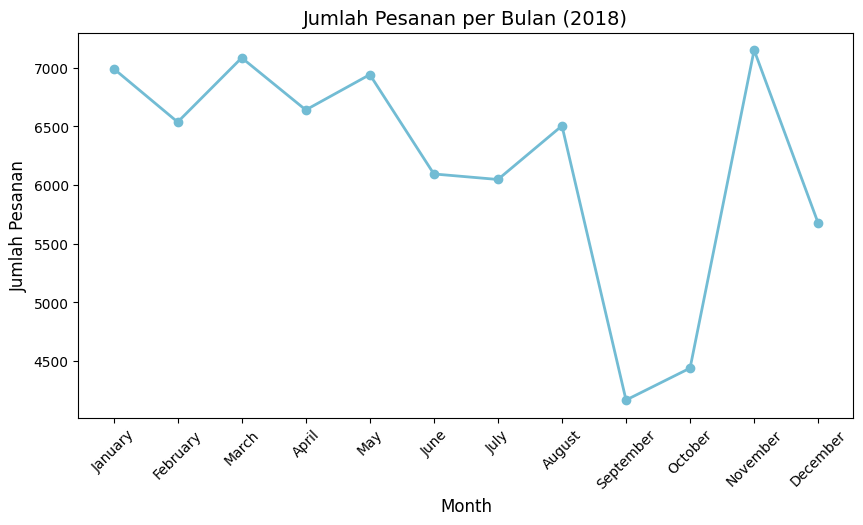

In [67]:
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_orders["order_date"] = pd.Categorical(monthly_orders["order_date"], categories=months_order, ordered=True)
monthly_orders = monthly_orders.sort_values("order_date")

plt.figure(figsize=(10,5))
plt.plot(monthly_orders["order_date"], monthly_orders["order_count"], marker="o", linewidth=2, color="#72BCD4")
plt.title("Jumlah Pesanan per Bulan (2018)", loc="center", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dari grafik tersebut, terlihat bahwa terdapat penurunan signifikan pada bulan September. Kemudian terjadi kenaikan signifikan pada bulan November.

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

untuk menjawab pertanyaan ini, akan dibuat DataFrame baru yang berisikan data produk dan kuantitas. Kemudian, informasi jumlah produk terjual akan divisualisasikan menggunakan bar chart.

In [68]:
sum_order_items = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items = sum_order_items.rename(columns={"product_id": "products"})
sum_order_items = sum_order_items.sort_values(by="products", ascending=False)
sum_order_items

,product_category_name_english,products
7,bed_bath_table,11813
43,health_beauty,9816
65,sports_leisure,8788
39,furniture_decor,8639
15,computers_accessories,7962
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,7


<ipython-input-69-f62eaa63b84f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items.head(5), palette=colors, ax=ax[0])
<ipython-input-69-f62eaa63b84f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])


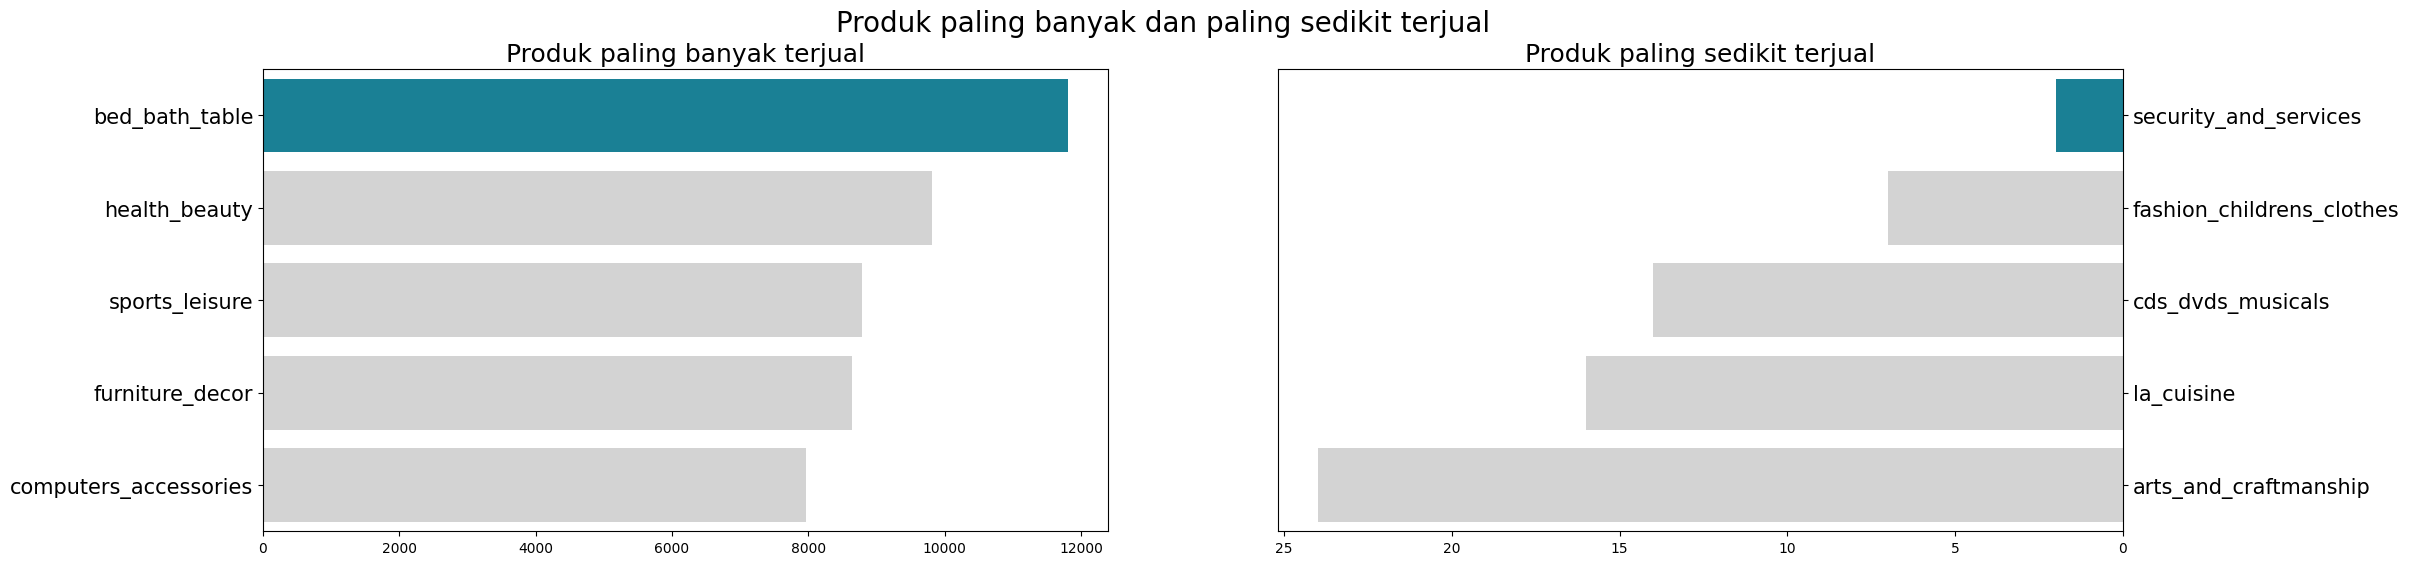

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

Terlihat dari grafik di atas, produk yang paling banyak terjual adalah bed_bath_table dan produk yang paling sedikit terjual adalah security_and_services

### Pertanyaan 3: Bagaimana Demografi Pelanggan yang Kita Miliki?

* Demografi pelanggan berdasarkan kota

<ipython-input-70-5a33b1277b2f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bycity.index,


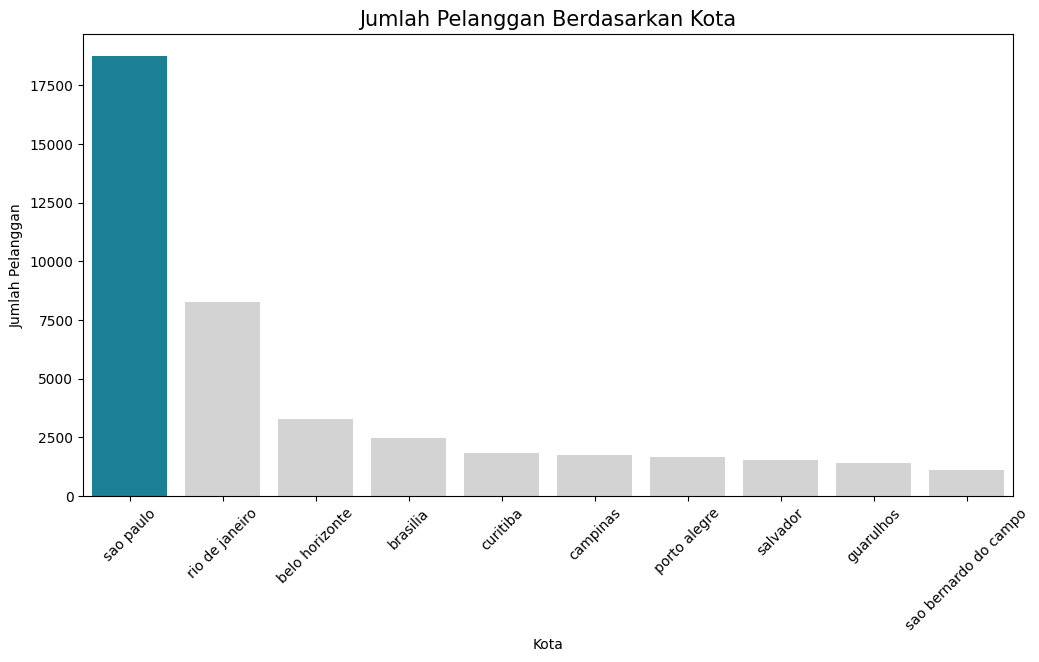

In [70]:
bycity = all_data['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bycity.idxmax()

bycity = bycity.sort_values(ascending=False)

sns.barplot(x=bycity.index,
            y=bycity.values,
            palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in bycity.index]
            )

plt.title("Jumlah Pelanggan Berdasarkan Kota", fontsize=15)
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45, fontsize=10)
plt.show()

Berdasarkan grafik di atas, Sao paulo memiliki jumlah customer tebanyak.

* Demografi berdasarkan state

<ipython-input-71-e4f501e75c29>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bystate.index,


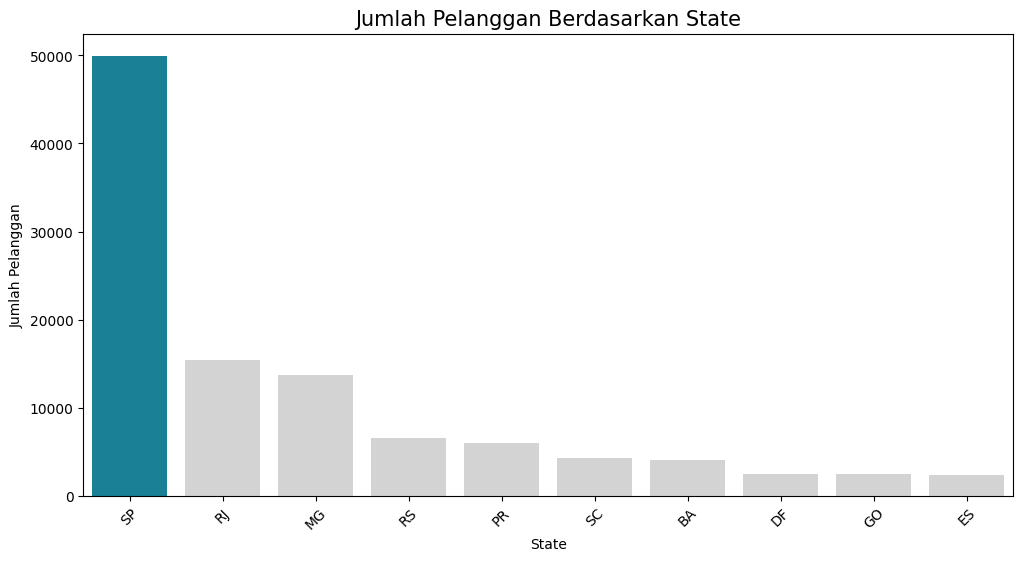

In [71]:
bystate = all_data['customer_state'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bystate.idxmax()

bystate = bystate.sort_values(ascending=False)

sns.barplot(x=bystate.index,
            y=bystate.values,
            palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in bystate.index]
            )

plt.title("Jumlah Pelanggan Berdasarkan State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45, fontsize=10)
plt.show()

Berdasarkan grafik di atas, SP adalah state dengan customer terbanyak.

### RFM Analysis untuk menjawab pertanyaan 4-6

Sebelum membuat analisis RFM, akan dibuat DataFrame baru yang memuat informasi ketiga parameter RFM yaitu recency, frequency, dan monetary.

In [72]:
rfm = all_data.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm.columns = ["customer_id", "order_purchase_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm["order_purchase_timestamp"] = rfm["order_purchase_timestamp"].dt.date
recent_date = orders["order_approved_at"].max()
rfm["recency"] = rfm["order_purchase_timestamp"].apply(lambda x: (recent_date - pd.to_datetime(x)).days)

rfm.drop("order_purchase_timestamp", axis=1, inplace=True)
rfm.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288.0
1,000161a058600d5901f007fab4c27140,1,67.41,409.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547.0
3,0002414f95344307404f0ace7a26f1d5,1,179.35,377.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,147.0


<ipython-input-73-899b2ee8660d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-73-899b2ee8660d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-73-899b2ee8660d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm.sort_values(by="monetary"

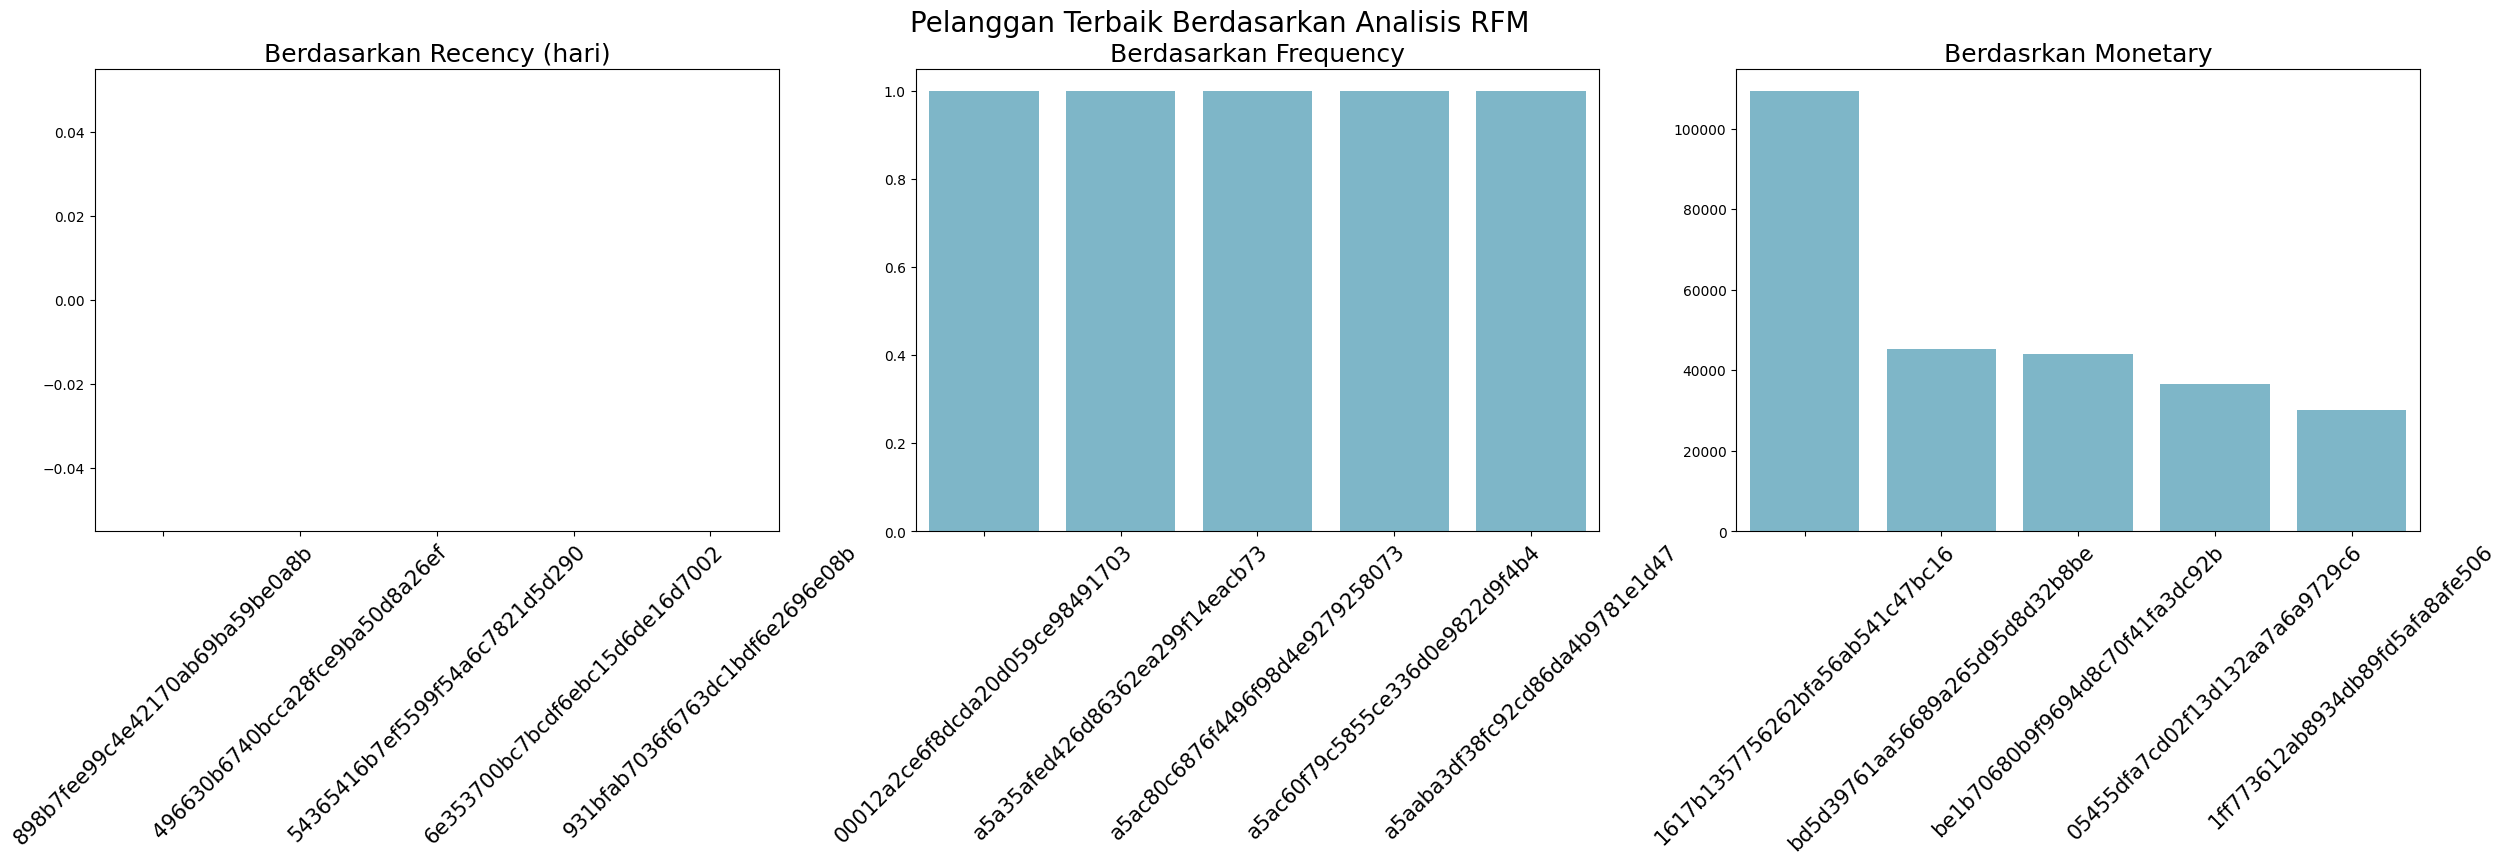

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', rotation=45, labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x',rotation=45, labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasrkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=45, labelsize=15)

plt.suptitle("Pelanggan Terbaik Berdasarkan Analisis RFM", fontsize=20)
plt.show()


## Conclusion

* Berdasarkan analisis yang telah dilakukan, dapat diketahui bahwa penjualan e-commerce cenderung stabil di bulan January-May. Terdapat sedikit naik turun penjualan pada bulan Juni-Agustus. Penurunan signifikan terjadi pada bulan pada bulan September 2018. Kemudian terjadi kenaikan signifikan pula pada bulan November 2018. Terjadi penurunan kembali pada bulan Desember.

* Berdasarkan grafik yang telah dibuat, dapat diketahi bahwa produk yang paling banyak terjual adalah bed_bath_table yaitu sebanyak 11814 buah. Sedangkan produk yang paling sedikit terjual adalah security_and_service yaitu sebanyak 2 buah.

* Berdasarkan kota pelanggan, kota dengan pelanggan terbanyak adalah Sao Paulo. Sedangkan berdasarkan state pelanggan, state dengan pelanggan terbanyak adalah SP.

* Berdasarkan analisis RFM, dapat diketahui bahwa grafik recency kosong, artinya pelanggan melakukan transaksi tidak dalam rentang waktu yang lama atau belum ada satu hari sejak pelanggan terakhir melakukan transaksi. Kemudian untuk frequency, semua pelanggan melakukan transaksi satu kali dalam waktu beberapa bulan terakhir. Untuk monetary, pelanggan paling banyak menghabiskan sejumlah lebih dari 100000 pada suatu transaksi.